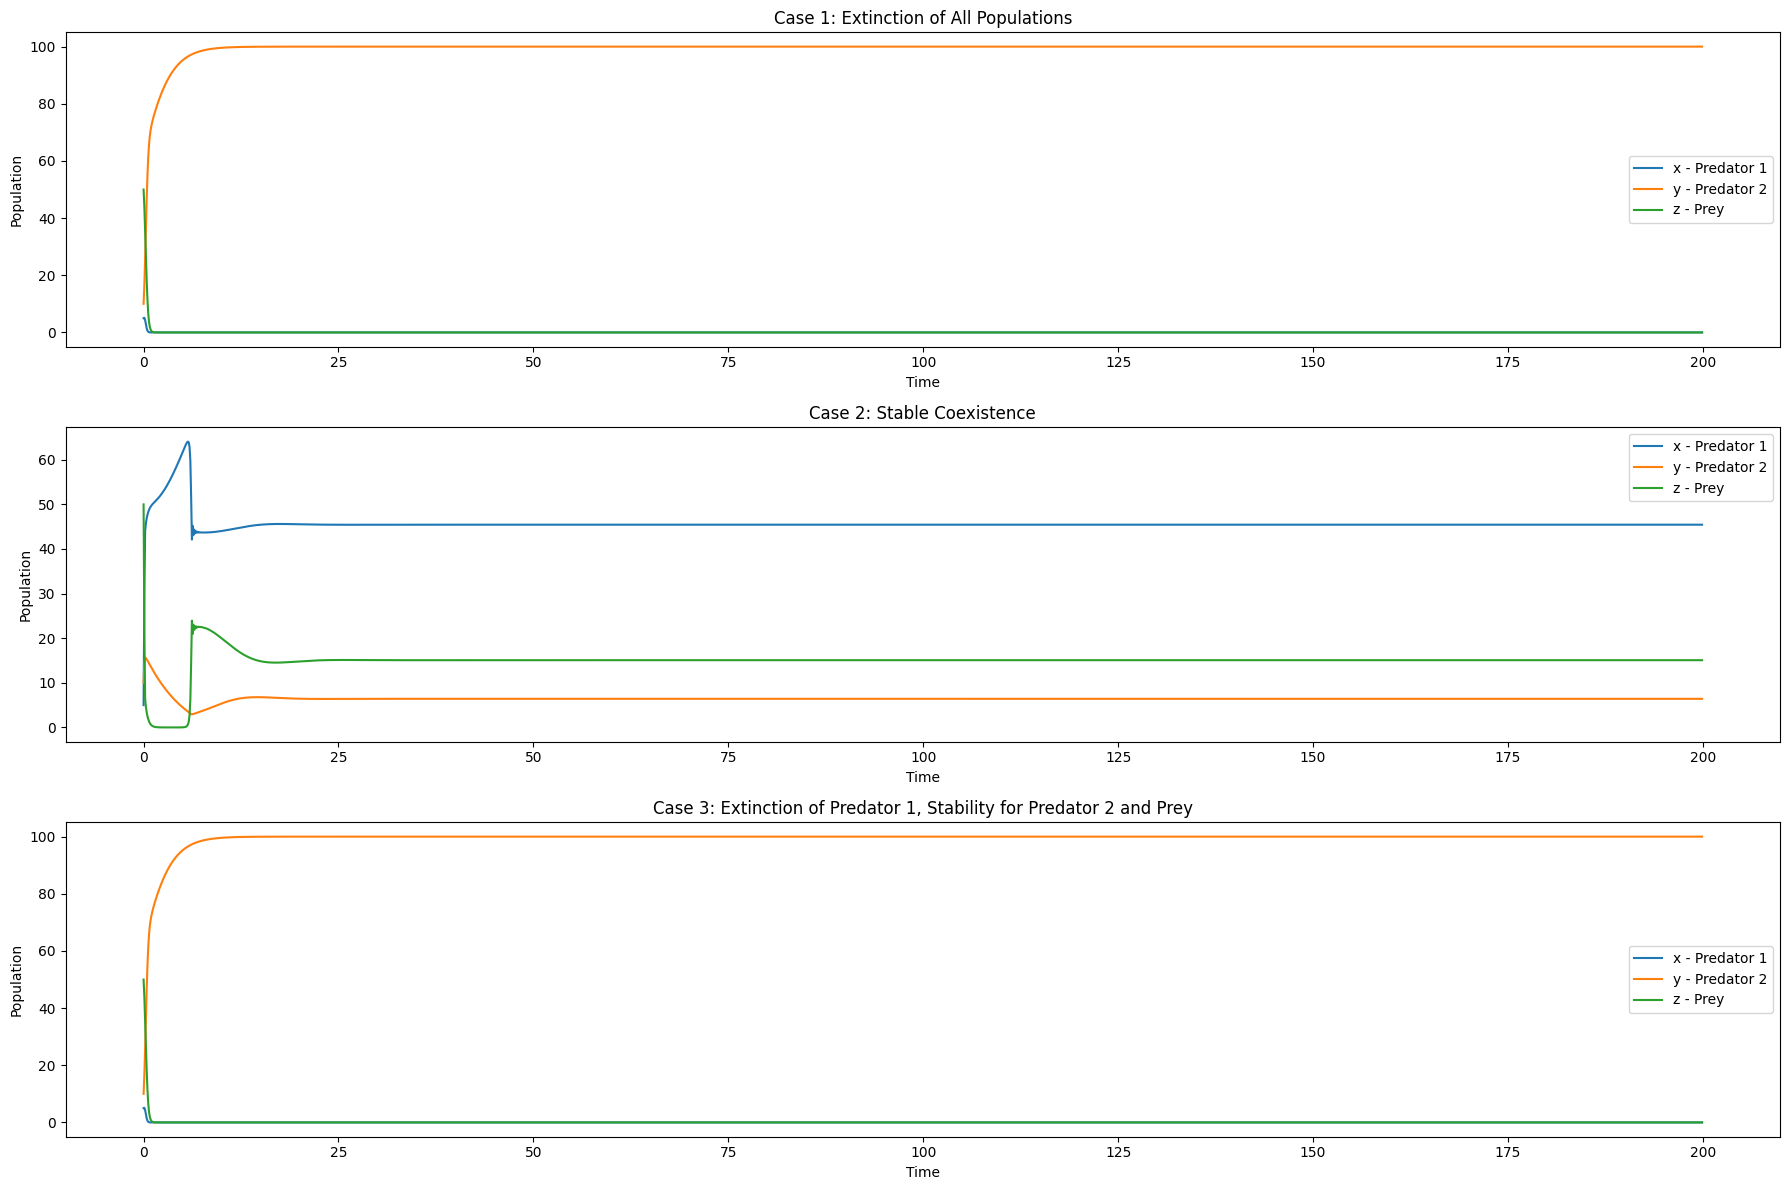

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# # Параметры модели (будем менять их для каждого случая)
# r1, r2, r3 = 0.5, 0.5, 0.5  # коэффициенты роста
# k1, k2, k3 = 100, 100, 100  # ёмкости среды
# b1, b2 = 0.02, 0.02         # коэффициенты конкуренции между хищниками
# beta1, beta2 = 0.01, 0.01   # коэффициенты воздействия хищников на жертву
# gamma1, gamma2 = 0.01, 0.01 # коэффициенты воздействия жертвы на хищников

# # Случай 1: все популяции стремятся к нулю
# r1, r2, r3 = 0.1, 0.1, 0.1
# solution_case1 = runge_kutta_4th_order(predator_prey_model, initial_conditions, t_values)

# # Случай 2: все три вида сосуществуют стабильно
# r1, r2, r3 = 0.5, 0.5, 0.5
# k1, k2, k3 = 100, 100, 100
# solution_case2 = runge_kutta_4th_order(predator_prey_model, initial_conditions, t_values)

# # Случай 3: исчезновение хищника x, стабильность для y и z
# r1, r2, r3 = 0.5, 0.5, 0.5
# k1, k2, k3 = 100, 100, 100
# b1 = 0.2  # Повышаем конкуренцию для хищника x
# solution_case3 = runge_kutta_4th_order(predator_prey_model, initial_conditions, t_values)

# Начальные условия
x0, y_pred0, z0 = 5, 10, 50  # Заменяем y0 на y_pred0

# Временной интервал
t_start, t_end, h = 0, 200, 0.1
t_values = np.arange(t_start, t_end, h)

# Система уравнений модели "хищник-жертва" с исправленными знаками
def predator_prey_model(t, populations):
    x, y_pred, z = populations  # Заменяем y на y_pred
    dx_dt = r1 * x * (1 - x / k1) - b1 * x * y_pred + beta1 * x * z
    dy_dt = r2 * y_pred * (1 - y_pred / k2) - b2 * x * y_pred + beta2 * y_pred * z
    dz_dt = r3 * z * (1 - z / k3) - gamma1 * x * z - gamma2 * y_pred * z
    return np.array([dx_dt, dy_dt, dz_dt])

# Метод Рунге-Кутта 4-го порядка
def runge_kutta_4th_order(f, y0, t_values):
    y = np.zeros((len(t_values), len(y0)))  # массив для значений x, y_pred, z
    y[0] = y0  # начальные условия
    
    for i in range(1, len(t_values)):
        t = t_values[i - 1]
        h = t_values[i] - t_values[i - 1]
        y_i = y[i - 1]
        
        # Вычисляем промежуточные значения k
        k1 = h * f(t, y_i)
        k2 = h * f(t + h / 2, y_i + k1 / 2)
        k3 = h * f(t + h / 2, y_i + k2 / 2)
        k4 = h * f(t + h, y_i + k3)
        
        # Обновляем значения для следующего шага
        y[i] = y_i + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
    return y

# Задание начальных условий и решение
initial_conditions = [x0, y_pred0, z0]  # Используем y_pred0 для второго хищника

# Все стремиться к нулю
r1, r2, r3 = 0.5, 0.5, 0.5
k1, k2, k3 = 100, 100, 100
beta1, beta2 = 0.05, 0.1
gamma1, gamma2 = 0.05, 0.1
b1, b2 = 0.2, 0.01
solution_case1 = runge_kutta_4th_order(predator_prey_model, initial_conditions, t_values)

# Все стабильно
r1, r2, r3 = 0.3, 0.3, 0.9
k1, k2, k3 = 100, 100, 50
beta1, beta2 = 0.5, 0.1
gamma1, gamma2 = 0.5, 0.1
b1, b2 = 0.01, 0.01
solution_case2 = runge_kutta_4th_order(predator_prey_model, initial_conditions, t_values)

# Только x стремиться к нулю
r1, r2, r3 = 0.5, 0.5, 0.5
k1, k2, k3 = 100, 100, 100
beta1, beta2 = 0.05, 0.1
gamma1, gamma2 = 0.05, 0.1
b1, b2 = 0.2, 0.01
solution_case3 = runge_kutta_4th_order(predator_prey_model, initial_conditions, t_values)

# Построение графиков для всех случаев
plt.figure(figsize=(18, 12))

# Все стремиться к нулю
plt.subplot(3, 1, 1)
plt.plot(t_values, solution_case1[:, 0], label="x - Predator 1")
plt.plot(t_values, solution_case1[:, 1], label="y - Predator 2")
plt.plot(t_values, solution_case1[:, 2], label="z - Prey")
plt.title("Case 1: Extinction of All Populations")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()

# Все стабильно
plt.subplot(3, 1, 2)
plt.plot(t_values, solution_case2[:, 0], label="x - Predator 1")
plt.plot(t_values, solution_case2[:, 1], label="y - Predator 2")
plt.plot(t_values, solution_case2[:, 2], label="z - Prey")
plt.title("Case 2: Stable Coexistence")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()

# Только x стремиться к нулю
plt.subplot(3, 1, 3)
plt.plot(t_values, solution_case3[:, 0], label="x - Predator 1")
plt.plot(t_values, solution_case3[:, 1], label="y - Predator 2")
plt.plot(t_values, solution_case3[:, 2], label="z - Prey")
plt.title("Case 3: Extinction of Predator 1, Stability for Predator 2 and Prey")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()

plt.tight_layout()
plt.show()